In [1]:
import sys
sys.path.append('/Users/paolamartire/shocks')

import numpy as np
import matplotlib.pyplot as plt

from grid_maker import make_grid
from Utilities.operators import calc_div, calc_grad, zero_interpolator

In [2]:
gamma = 5/3
mach_min = 1.3
num = 45

In [3]:
gridded_indexes, gridded_den, gridded_T, gridded_P, gridded_Vx, gridded_Vy, gridded_Vz, gridded_V, gridded_Rcell, x_radii, y_radii, z_radii = make_grid(num)

all T=0, bro. CHANGE!
Progress: 0%
Progress: 20%
Progress: 40%
Progress: 60%
Progress: 80%


In [4]:
# TEST shock direction
gradx = []
grady = []
X_cell = []
Y_cell = []
idx_slice = 24
for i in range(1, len(x_radii)-1):
    for j in range(1,len(y_radii)-1):
        for k in range(idx_slice,idx_slice+1):
            idx = [i,j,k]
            grad =  calc_grad(x_radii, y_radii, z_radii, gridded_T, idx, kind_info = 'idx')
            gradx.append(grad[0])
            grady.append(grad[1])
            X_cell.append(x_radii[i])
            Y_cell.append(y_radii[j])

In [5]:
flat_T = gridded_T[:,:,idx_slice]
T_plot = np.log10(flat_T)
T_plot = np.nan_to_num(T_plot, neginf = 0)

In [7]:
X_cell = np.array(X_cell)
Y_cell = np.array(Y_cell)
gradx = np.array(gradx)
grady = np.array(grady)

In [8]:
ending_arrowx = X_cell + gradx
ending_arrowy = Y_cell + grady

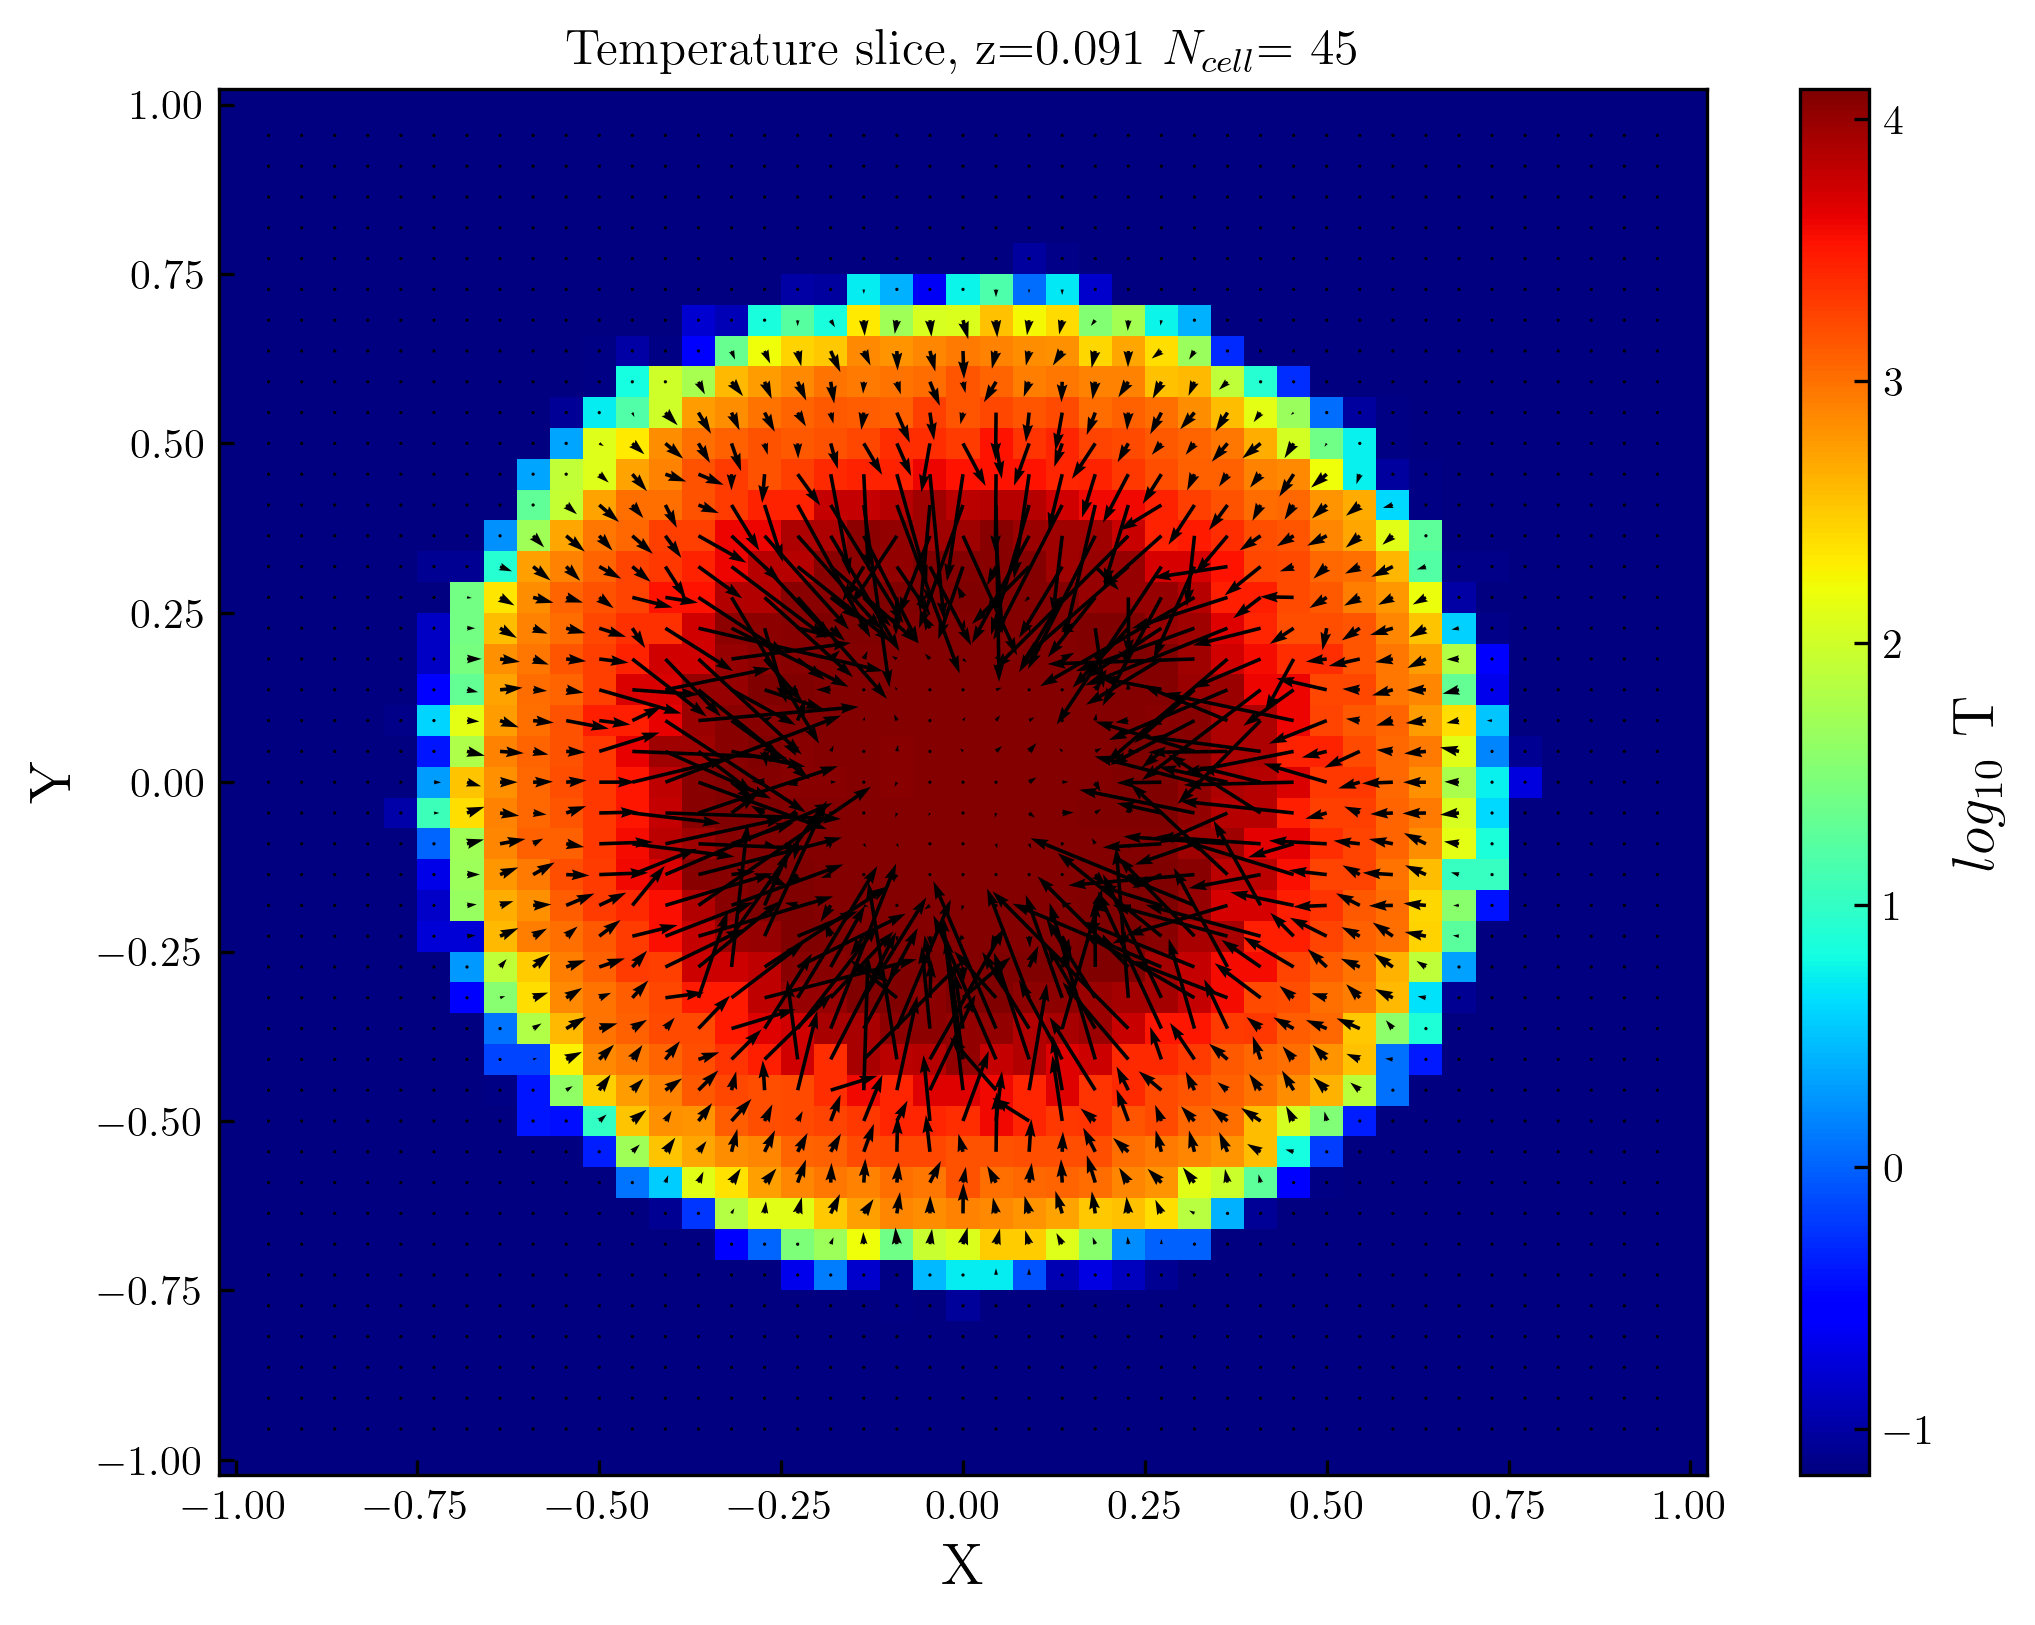

In [13]:
z_chosen = np.round(z_radii[idx_slice],3)
fig, ax = plt.subplots(1,1)
ax.set_xlabel('X', fontsize = 14)
ax.set_ylabel('Y', fontsize = 14)
img = ax.pcolormesh(x_radii, y_radii, T_plot.T, cmap = 'jet')
cb = plt.colorbar(img)
cb.set_label(r'$log_{10}$ T', fontsize = 14)
ax.quiver(X_cell, Y_cell, ending_arrowx, ending_arrowy, color = 'k')# arrow_length_ratio=0.1, color = 'k')
plt.title(f'Temperature slice, z={z_chosen} ' + r' $N_{cell}$'+ f'= {num}')
plt.savefig(f'Figs/Tslice_z{z_chosen}_num{num}.png')